In [16]:
import numpy as np
import pandas as pd
from heatgeo.embedding import HeatGeo
import scprep
import scanpy as sc
import phate
from scipy.spatial.distance import pdist, squareform, cdist

In [2]:
data = sc.read("../data/old/BMMC_myeloid.h5ad")

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/geosink/lib/python3.11/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [3]:
data.X

array([[-0.11410707, -0.05249726, -0.03929007, ..., -0.08260062,
        -0.06396022, -0.6135216 ],
       [-0.11410707, -0.05249726, -0.03929007, ..., -0.08260062,
        -0.06396022, -0.6135216 ],
       [-0.11410707, -0.05249726, -0.03929007, ..., -0.08260062,
        -0.06396022, -0.6135216 ],
       ...,
       [-0.11410707, -0.05249726, -0.03929007, ..., -0.08260062,
        -0.06396022, -0.6135216 ],
       [-0.11410707, -0.05249726, -0.03929007, ..., -0.08260062,
        -0.06396022,  1.066885  ],
       [ 3.569493  , -0.05249726, -0.03929007, ..., -0.08260062,
        -0.06396022, -0.6135216 ]], dtype=float32)

In [4]:
data.obsm["X_phate"]

array([[ 0.00028883, -0.00124718],
       [ 0.00194471, -0.01732078],
       [-0.00422122,  0.00063668],
       ...,
       [-0.00884071, -0.00377356],
       [-0.00526951,  0.00333955],
       [ 0.01295635, -0.00277191]])

In [5]:
emb_op = HeatGeo(knn=5)
emb = emb_op.fit_transform(data.X)

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/geosink/lib/python3.11/site-packages/graphtools/graphs.py:290: RuntimeWarning: Detected zero distance between 11 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(


Using s_gd2 for MDS. None


<Axes: xlabel='HeatGeo1', ylabel='HeatGeo2'>

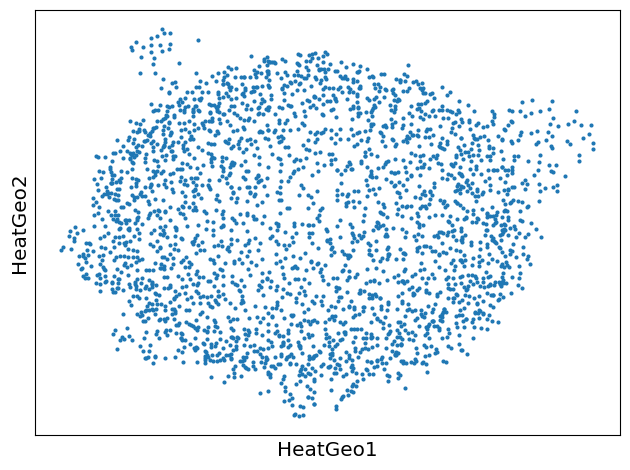

In [6]:
scprep.plot.scatter2d(emb, ticks=False, label_prefix="HeatGeo")

In [9]:
phate_op = phate.PHATE()
phate_emb = phate_op.fit_transform(data.X)

Calculating PHATE...
  Running PHATE on 2730 observations and 298 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.10 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.89 seconds.
    Calculating affinities...
    Calculated affinities in 0.07 seconds.
  Calculated graph and diffusion operator in 1.08 seconds.
  Calculating landmark operator...
    Calculating SVD...


/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/geosink/lib/python3.11/site-packages/graphtools/graphs.py:290: RuntimeWarning: Detected zero distance between 11 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(


    Calculated SVD in 0.23 seconds.
    Calculating KMeans...
    Calculated KMeans in 4.59 seconds.
  Calculated landmark operator in 5.78 seconds.
  Calculating optimal t...
    Automatically selected t = 26
  Calculated optimal t in 3.78 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 1.70 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 4.19 seconds.
Calculated PHATE in 16.56 seconds.


In [7]:
# np.save("../data/myeloid_heatgeo.npy", emb)
# np.save("../data/myeloid.npy", data.X)
# np.save("../data/myeloid_phate.npy", data.obsm["X_phate"])


In [11]:
pca_loadings = phate_op.graph.data_nu
pca_components = phate_op.graph.data_pca.components_

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/geosink/lib/python3.11/site-packages/graphtools/graphs.py:290: RuntimeWarning: Detected zero distance between 11 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(


Using s_gd2 for MDS. None


<Axes: xlabel='HeatGeo1', ylabel='HeatGeo2'>

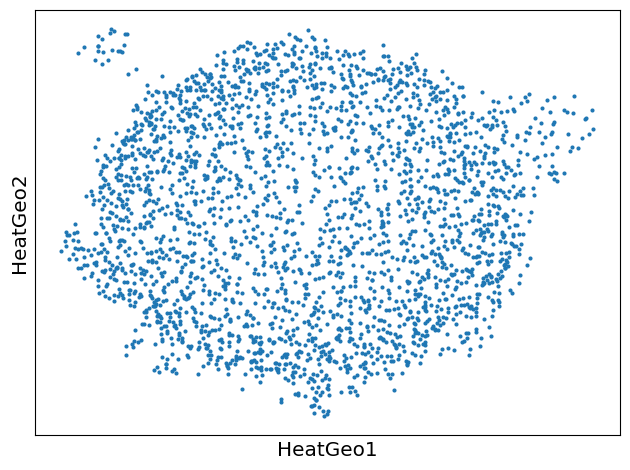

In [12]:
emb_op = HeatGeo(knn=5)
emb = emb_op.fit_transform(pca_loadings)
scprep.plot.scatter2d(emb, ticks=False, label_prefix="HeatGeo")

In [19]:
emb_op.metric_computation(pca_loadings)

Calculating PHATE...
  Running PHATE on 2730 observations and 298 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.10 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.95 seconds.
    Calculating affinities...
    Calculated affinities in 0.09 seconds.
  Calculated graph and diffusion operator in 1.15 seconds.
  Calculating landmark operator...
    Calculating SVD...


/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/geosink/lib/python3.11/site-packages/graphtools/graphs.py:290: RuntimeWarning: Detected zero distance between 11 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(


    Calculated SVD in 0.25 seconds.
    Calculating KMeans...
    Calculated KMeans in 3.95 seconds.
  Calculated landmark operator in 5.10 seconds.
  Calculating optimal t...
    Automatically selected t = 20
  Calculated optimal t in 4.05 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 1.74 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 4.70 seconds.
Calculated PHATE in 16.75 seconds.


<Axes: xlabel='HeatGeo1', ylabel='HeatGeo2'>

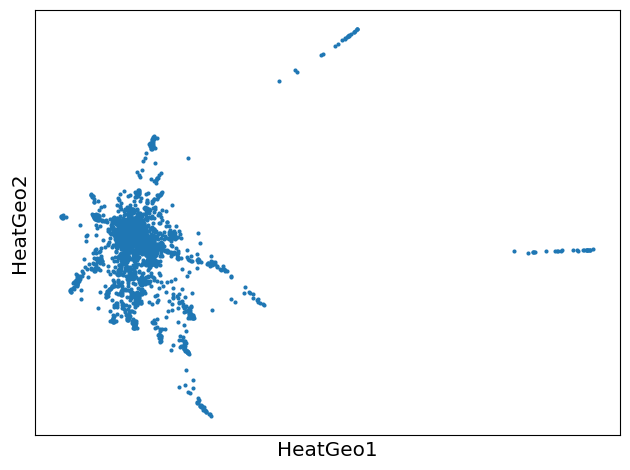

In [13]:
phate_op = phate.PHATE()
phate_emb = phate_op.fit_transform(data.X)
scprep.plot.scatter2d(phate_emb, ticks=False, label_prefix="PHATE")

In [14]:
colors = np.ones(pca_loadings.shape[0])

<Axes: xlabel='PHATE1', ylabel='PHATE2'>

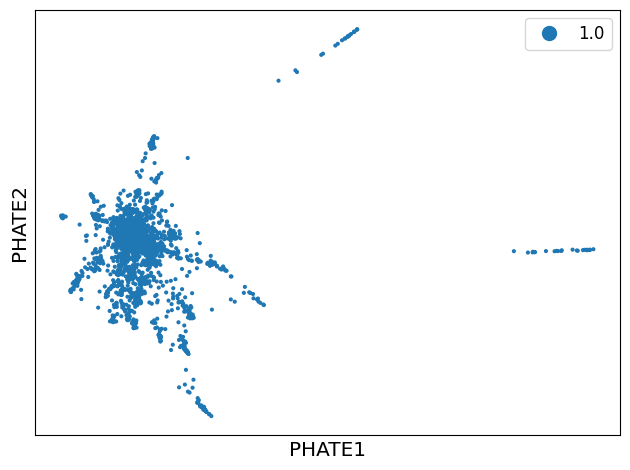

In [15]:
scprep.plot.scatter2d(phate_emb, ticks=False, label_prefix="PHATE", c=colors)

In [17]:
phate_dist = squareform(pdist(phate_op.diff_potential))

In [18]:
np.savez(
    '../data/myeloid.npz', 
    data=pca_loadings, 
    phate=phate_emb, 
    dist=phate_dist, 
    colors=colors
)

In [20]:
np.savez(
    '../data/myeloid_heatgeo.npz', 
    data=pca_loadings, 
    phate=emb, 
    dist=emb_op.dist, 
    colors=colors
)